# basic statistics to describe the Unfallorte dataset
## reading our data and checking for missing values

In [1]:
import numpy as np
import pandas as pd
import warnings
import os

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams['figure.figsize'] = [12,6]

In [3]:
acci = pd.read_csv(os.path.join("../data","Unfallorte2019_LinRef.txt"),sep=';', decimal=',')
# df_from_csv = pd.read_csv("Unfallorte2019_LinRef.txt")
# acci.head

In [147]:
print('*** shape and size ***')
print(acci.shape , acci.size)
print('*** data types, including info on missing values ***')
print(acci.info())
print('*** more info, basic statistics ***')
print(acci.describe())

#print (type(df['tuples'].iat[0]))

*** shape and size ***
(268370, 24) 6440880
*** data types, including info on missing values ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268370 entries, 0 to 268369
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   OBJECTID     268370 non-null  int64  
 1   ULAND        268370 non-null  int64  
 2   UREGBEZ      268370 non-null  int64  
 3   UKREIS       268370 non-null  int64  
 4   UGEMEINDE    268370 non-null  int64  
 5   UJAHR        268370 non-null  int64  
 6   UMONAT       268370 non-null  int64  
 7   USTUNDE      268370 non-null  int64  
 8   UWOCHENTAG   268370 non-null  int64  
 9   UKATEGORIE   268370 non-null  int64  
 10  UART         268370 non-null  int64  
 11  UTYP1        268370 non-null  int64  
 12  ULICHTVERH   268370 non-null  int64  
 13  IstRad       268370 non-null  int64  
 14  IstPKW       268370 non-null  int64  
 15  IstFuss      268370 non-null  int64  
 16  IstKrad      

looks like 20 integer valued columns, 4 float columns.
looks like no missing values.

In [150]:
# built in to describe a dataframe
descr = acci.describe()
# we select from the info that is returned by describe() and add our own column(s)
my_descr = pd.DataFrame(columns= acci.columns, index=['min','range','unique'])

my_descr.loc['min'] = descr.loc['min']
#my_descr.loc['max'] = descr.loc['max']
my_descr.loc['range'] = descr.loc['max']-descr.loc['min']+1

for ac in acci.columns:
    my_descr.loc['unique',ac] = len(acci[ac].unique()) 
    
my_descr

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND
min,1,1,0,1,0,2019,1,0,1,1,...,0,0,0,0,0,280437,5.24727e+06,5.86726,47.3719,0
range,268370,16,10,91,719,1,12,24,7,3,...,2,2,2,2,2,639919,851356,10.1614,8.66115,3
unique,268370,15,9,87,533,1,12,24,7,3,...,2,2,2,2,2,264383,264384,264362,264356,3


The ULAND column shows us that there are 15 Lands in a range of 16. Data is missing for the ULAND 13.

Interpretation of numerical values requires a meta data pdf, accompagnying the data. ULAND 13 is Mecklenburg-Vorpommern, a Land north of Berlin, bordering on the Baltic Sea and Poland.

## basic plots for columns in isolation
introducing the interpretation for each column

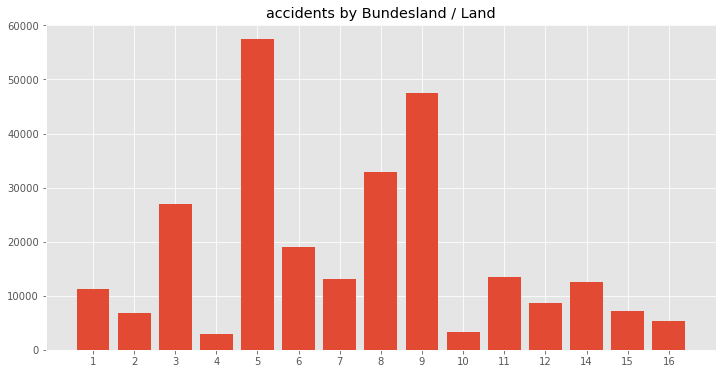

In [203]:
xgrid = np.arange(start=1,stop=16)
ydata = acci['OBJECTID'].groupby(acci['ULAND']).agg('count')
plt.bar(x=xgrid, height=ydata)

plt.xticks(xgrid,ydata.index)
#plt.ylabel('Usage')
plt.title('accidents by Bundesland / Land')

plt.show()

#acci['OBJECTID'].groupby(acci['ULAND']).agg('count')
#ydata

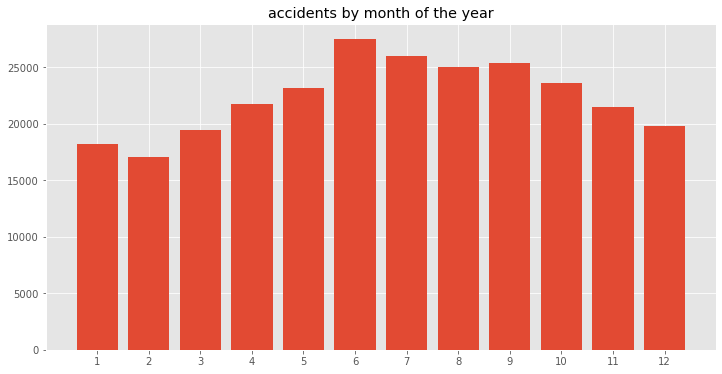

In [221]:
ydata = acci['OBJECTID'].groupby(acci['UMONAT']).agg('count')
xgrid = np.arange(start=1 , stop= ydata.shape[0]+1)
plt.bar(x=xgrid, height=ydata)

plt.xticks(xgrid,ydata.index)
#plt.ylabel('Usage')
plt.title('accidents by month of the year')

plt.show()

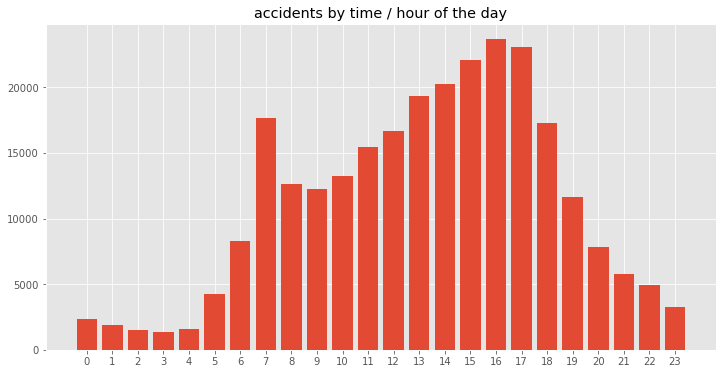

In [223]:
ydata = acci['OBJECTID'].groupby(acci['USTUNDE']).agg('count')
xgrid = np.arange(start=1 , stop= ydata.shape[0]+1)
plt.bar(x=xgrid, height=ydata)

plt.xticks(xgrid,ydata.index)
#plt.ylabel('Usage')
plt.title('accidents by hour of the day')

plt.show()

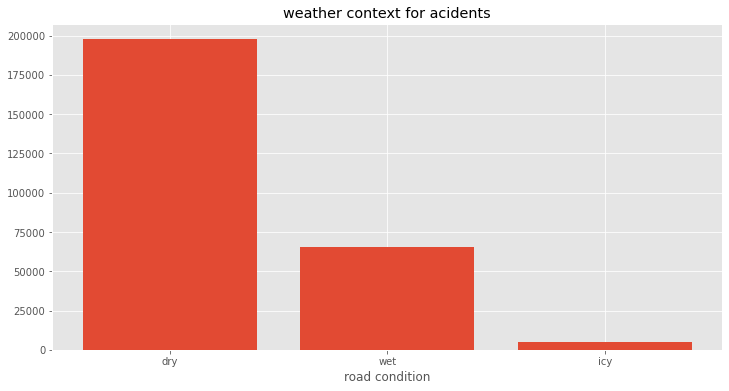

In [317]:
ydata = acci['OBJECTID'].groupby(acci['STRZUSTAND']).agg('count')
xgrid = np.arange(start=1 , stop= ydata.shape[0]+1)
plt.bar(x=xgrid, height=ydata)

plt.xticks(xgrid,['dry','wet','icy'])
plt.xlabel('road condition')
plt.title('weather context for acidents')

plt.show()

In [269]:
def plot_col (ax, name):
    ydata = acci['OBJECTID'].groupby(acci[name]).agg('count')
    xgrid = np.arange(start=1 , stop= ydata.shape[0]+1)
    ax.set_title(name)
    return ax.bar(x=xgrid, height=ydata)
    
# would be nice to have the x-axes labeled yes and no
# and to have different colours for yes and no bars
# ticks at y axis only for 100K and 200K

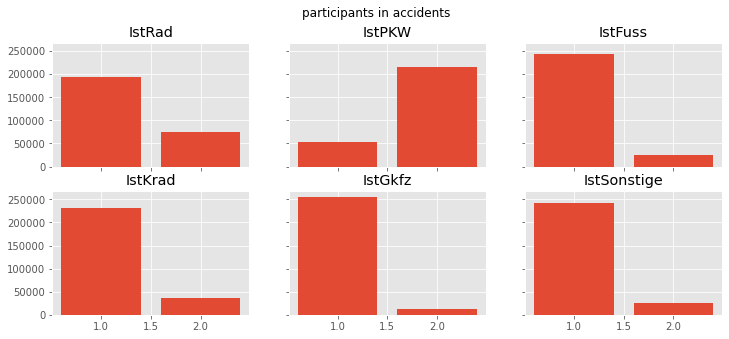

In [308]:
import itertools as it

fig, axs = plt.subplots(2, 3,figsize=(12, 5), sharey=True)
fig.suptitle('participants in accidents')

# go through the subplots and zip their index with the columns name to be plotted
index_name = zip(it.product(range(2),range(3)), acci.columns[13:19])

for i,n in index_name:
    plot_col(axs[i], n)

for ax in axs.flat:
    ax.label_outer() 

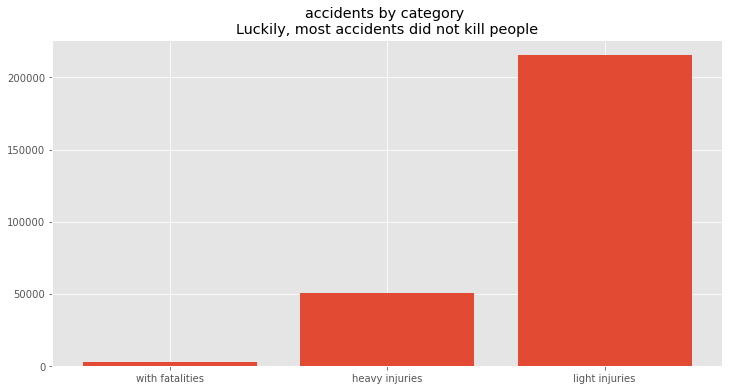

In [231]:
ydata = acci['OBJECTID'].groupby(acci['UKATEGORIE']).agg('count')
xgrid = np.arange(start=1 , stop= ydata.shape[0]+1)
plt.bar(x=xgrid, height=ydata)

plt.xticks(xgrid,['with fatalities','heavy injuries','light injuries'])
#plt.ylabel('Usage')
plt.title('accidents by category \nluckily, most accidents did not kill people')

plt.show()


/opt/anaconda3/envs/urbtech/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


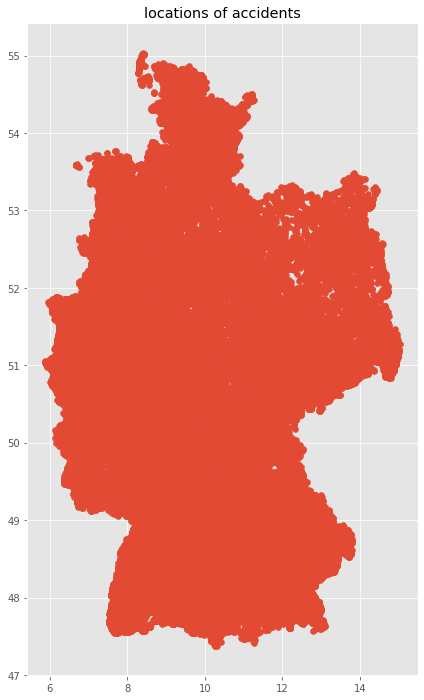

In [328]:
fig = plt.figure(figsize=(7,12))
plt.title('locations of accidents')
ax=fig.add_subplot()
ax.scatter(x=acci['XGCSWGS84'], y=acci['YGCSWGS84'])
# 1:1 ratio so it will look more familiar

## correlation or interaction of data
yet to come. Like 

In [148]:
a = pd.DataFrame(acci[acci['ULAND']==11][ acci['UKATEGORIE']==1]) # Berlin accidents with fatalities

/opt/anaconda3/envs/urbtech/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [149]:
a

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,STRZUSTAND
49228,49229,11,0,1,1,2019,2,10,4,1,...,0,0,0,1,0,799571.012000,5.828270e+06,13.416384,52.522004,0
49810,49811,11,0,10,10,2019,1,10,7,1,...,1,1,0,0,0,807656.052287,5.829873e+06,13.536660,52.531871,1
50858,50859,11,0,5,5,2019,11,17,3,1,...,1,1,0,0,1,785375.076441,5.826218e+06,13.205971,52.511220,1
51740,51741,11,0,2,2,2019,6,16,5,1,...,1,1,0,0,0,801117.586196,5.827837e+06,13.438718,52.517271,0
191207,191208,11,0,4,4,2019,1,17,3,1,...,1,1,0,0,0,790860.257610,5.823812e+06,13.284469,52.486759,1
191591,191592,11,0,6,6,2019,1,18,7,1,...,1,1,0,0,1,790202.264775,5.815163e+06,13.267292,52.409562,1
191705,191706,11,0,1,1,2019,2,11,6,1,...,0,1,0,0,1,794560.496992,5.828452e+06,13.342911,52.526367,1
193012,193013,11,0,12,12,2019,3,13,1,1,...,0,1,1,0,0,794621.411844,5.832992e+06,13.347834,52.567027,0
193201,193202,11,0,1,1,2019,3,19,4,1,...,1,1,0,0,1,796569.702410,5.829847e+06,13.373685,52.537779,0
194333,194334,11,0,5,5,2019,4,3,7,1,...,1,0,0,1,0,784381.680477,5.829958e+06,13.194571,52.545272,0


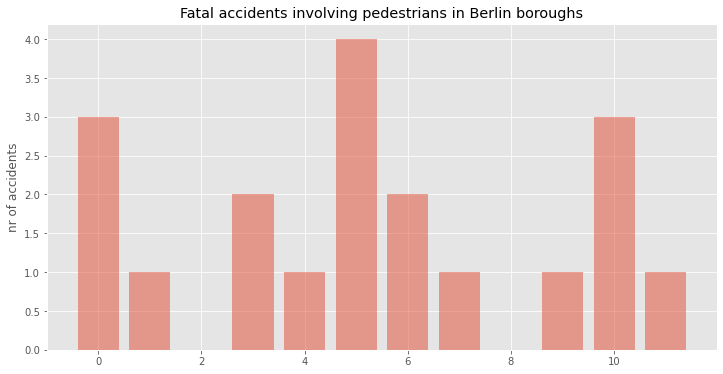

In [332]:
b = a['IstFuss'].groupby(a['UKREIS']).sum()

plt.bar(x= np.arange(12), height= b, align='center', alpha=0.5)

plt.ylabel('nr of accidents')

plt.title('Fatal accidents involving pedestrians in Berlin boroughs')
# remove ticks at 0.5, 1.5 etc

plt.show()

The data does not contain information on the names of places where accidents happened. One can look up the ULAND variable in the accompangying meta data pdf. But there is no further information on UREGBEZ, UKREIS, UGEMEINDE which refer to the politival / administrative structure of Germany.
Luckily, we can use the nominatim API to get addresses and administrative bodies from geolocations.
We can also use our knowledge of Berlin topography to infere the borough from a plotof the accident locations.

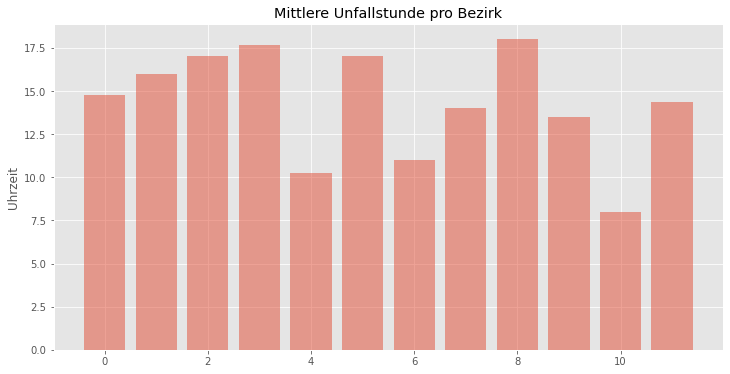

In [333]:
b= a['USTUNDE'].groupby(a['UKREIS']).mean()

plt.bar(x= np.arange(12), height= b, align='center', alpha=0.5)

plt.ylabel('Uhrzeit')
plt.title('Mittlere Unfallstunde pro Bezirk')

plt.show()

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# The following graph is misleading
The data lists accidents where 1 or more people were killed. And it lists if pedestrian, bicyclist, motorcicles and / or cars were involved in the accident. 
The graph looks like it would represent the number and types of Verkehrsteilnehmer that werde killed. Typically, in an accident in which a pedestrian and a car were involved and there was a fatality, it was the pedestrian who was killed.

In [13]:
# grouped = a['IstFuss','IstPKW'].groupby(a['UKREIS'])
b=a.groupby(['UKREIS'])[['IstFuss','IstRad','IstKrad','IstPKW','IstGkfz','IstSonstige']].sum()
b

,IstFuss,IstRad,IstKrad,IstPKW,IstGkfz,IstSonstige
UKREIS,,,,,,
1,3,1,0,2,1,3
2,1,0,0,1,0,0
3,0,0,0,0,0,2
4,2,2,2,6,0,0
5,1,1,0,3,2,1
6,4,1,0,3,1,1
7,2,0,0,0,2,0
8,1,0,0,0,1,0
9,0,1,0,0,0,0


In [91]:
b['IstFuss']

UKREIS
1     3
2     1
3     0
4     2
5     1
6     4
7     2
8     1
9     0
10    1
11    3
12    1
Name: IstFuss, dtype: int64

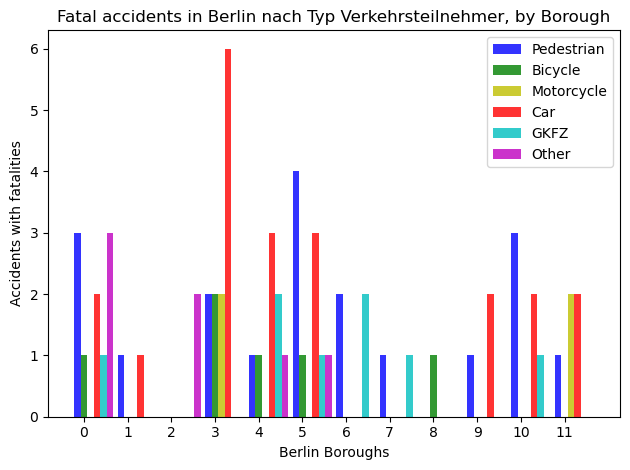

In [14]:
# data to plot
n_groups = 12
b1 = b['IstFuss']
b2 = b['IstRad'] # means_guido

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, b['IstFuss'], bar_width,
alpha=opacity,
color='b',
label='Pedestrian')

rects2 = plt.bar(index + bar_width, b['IstRad'] , bar_width,
alpha=opacity,
color='g',
label='Bicycle')

rects3 = plt.bar(index + 2*bar_width, b['IstKrad'], bar_width,
alpha=opacity,
color='y',
label='Motorcycle')

rects4 = plt.bar(index + 3*bar_width, b['IstPKW'], bar_width,
alpha=opacity,
color='r',
label='Car')

rects5 = plt.bar(index + 4*bar_width, b['IstGkfz'], bar_width,
alpha=opacity,
color='c',
label='GKFZ')

rects4 = plt.bar(index + 5*bar_width, b['IstSonstige'], bar_width,
alpha=opacity,
color='m',
label='Other')

plt.xlabel('Berlin Boroughs')
plt.ylabel('Accidents with fatalities')
plt.title('Fatal accidents in Berlin nach Typ Verkehrsteilnehmer, by Borough')
plt.xticks(index + bar_width, np.arange(12))
plt.legend()

plt.tight_layout()
plt.show()

In Borough 8 there was 1 accident with a fatality, it involved only a cyclist. This is strange. Maybe it were two cyclists!

# What else

We could check if the whether condition (STRZUSTAND 0 for dry streets, 1 for wet, slippery streets) makes a difference. How exactly?
We seperate the dataset in two groups. We can check if the ratio of pedestrians to cars is different in both groups. And if it is different on a statistically significant level.

What kind of distribution is the vector [IstFuss,IstRad,IstKrad,IstPKW,IstGkfz,IstSonstige] where each variable is 0 or 1? 

I would sum over each variable (IstFuss,..). To interpret the total sums we would need data on the frequency of rainy vs dry streets. We can get data on rainy days vs dry days. But not on a geolocation level?! And if it had rained on a day when an accident happened, it is not sure that the street was wet /slippery at the time of the accident.

Instead of looking at the total numers, we should look at the ratios: percentage of pedestrians vs percentage of bycicles.

# code to learn from

In [265]:
# code to learn from, plt documentation
'''x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y ** 2)
axs[1].plot(x, 0.3 * y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer() '''

"x = np.linspace(0, 2 * np.pi, 400)\ny = np.sin(x ** 2)\nfig = plt.figure()\ngs = fig.add_gridspec(3, hspace=0)\naxs = gs.subplots(sharex=True, sharey=True)\nfig.suptitle('Sharing both axes')\naxs[0].plot(x, y ** 2)\naxs[1].plot(x, 0.3 * y, 'o')\naxs[2].plot(x, y, '+')\n\n# Hide x labels and tick labels for all but bottom plot.\nfor ax in axs:\n    ax.label_outer() "